## Chapter 4 The Dynamics of The Epigenics System



## Figure 1
Goodwin describes a "unit component" comprised of:
A genetic locus, _Li_, which synthesizes _Xi_ quantities of mRNA. The mRNA is used for the synthesis of _Yi_ quantities of the particular protein species. The proteins act in the cell space C, such that a metabolic species (a metabolite) is produced in _Mi_ quantities. A fraction of Mi returns to Li, closing the control loop, acting as a repressor for Li.

### Writing fig. 1 mathematically
The control cycle of fig. 1 will be expressed as a system of equations with control variables Xi, Yi, and Mi.

### Rate of protein synthesis dY/dt
Assumed to be the simplest functions which satisfy the control requirements of the model.
dYidt = rate of synthesis(X, Y, M) - rate of degradation(Y, M)
Assume degradation, = betai, to be a constant.

dYidt = (alphai * Xi) - betai

### Rate of mRNA synthesis dX/dt
dXidt = rate of synthesis(X,Y,M) - degradation(X,Y,M)


### The Feedback Signal
Assume the cell has a metabolic pool, or storage capacity, called Si, for the metabolite Mi.
if Mi < Si, there will be no spill over, and the feedback signal is ZERO.


FB_Signal = ohi * (Mi - Si)^n

### Plotting control equations

In [3]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
from scipy.integrate import odeint


In [44]:
# Define parameter values

aix = 72 # affects mRNA synthesis (proportional)
Ai = 10 # affects mRNA synthesis (inverse proportional)
ki = 0.02 # effect of protein quantity in mRNA synthesis
bi = 2 # mRNA degradation
aiy = 1 # Protein synthesis 
Bi = 1 # Protein degradation

y0 = [0,0] # Initial quantities for X, Y.
t = np.linspace(0, 500, num=200) 

params = [aix, Ai, ki, bi, aiy, Bi]

In [45]:
def simNonInteractive(variables, t, params, ):

    X = variables[0]
    Y = variables[1]
    
    aix = params[0]
    Ai = params[1]
    ki = params[2]
    bi = params[3]
    aiy = params[4]
    Bi = params[5]

    
    Xt = (aix/(Ai + (ki * Y))) - bi
    Yt = (aiy * X) - Bi 

    return ([Xt, Yt])

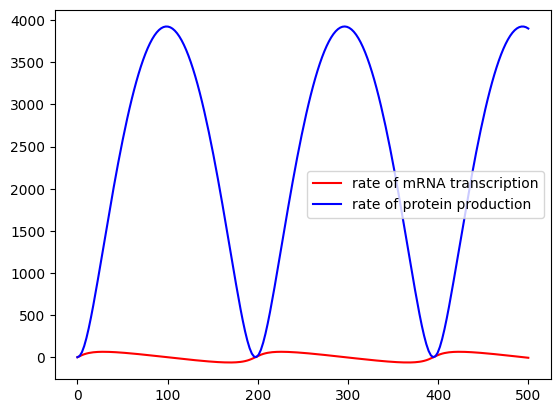

In [46]:
# Run simulation
yNonInteractive = odeint(simNonInteractive, y0, t, args=(params,))

# Make plot X(t) x Y(t)
fig, ax1 = plt.subplots(1)

# Non Interactive 
line1 = ax1.plot(t, yNonInteractive[:,0], color="r", label="rate of mRNA transcription")
line2 = ax1.plot(t, yNonInteractive[:,1], color="b", label="rate of protein production")

#line3 = ax2.plot(yNonInteractive[:,0], yNonInteractive[:,1], color="b", label="rateX by rateY")

ax1.legend()
#ax2.legend()

plt.show()

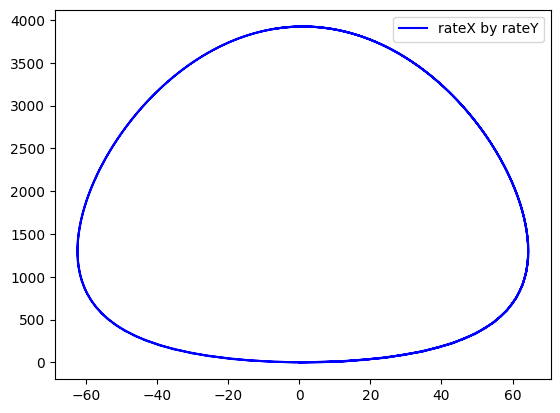

In [47]:
# Shows Limit Cycle

fig, ax2 = plt.subplots(1)
line3 = ax2.plot(yNonInteractive[:,0], yNonInteractive[:,1], color="b", label="rateX by rateY")
ax2.legend()
plt.show()

Note that the limit cycle will only appear when a full oscillation has been plotted.